In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule de correlation du seisme et inondation avec d'autre valeurs

In [ ]:
# Drop the columns you want to ignore
columns_to_ignore = ['quartier', 'date', 'catastrophe']  # Add any other columns you want to ignore
df_filtered = df.drop(columns=columns_to_ignore)

# Check the correlation between seism and other variables
correlation_matrix = df_filtered.corr()

# Display the correlation of seism with other variables
seism_correlation = correlation_matrix['seisme'].sort_values(ascending=False)
inondation_correlation = correlation_matrix['inondation'].sort_values(ascending=False)


print(seism_correlation)
print(inondation_correlation)

# Affichage de Correlation Heatmap

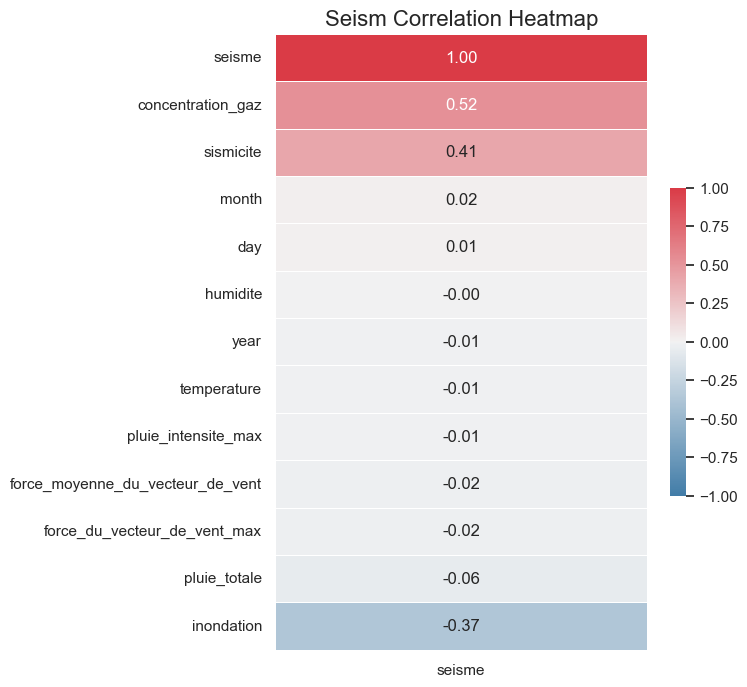

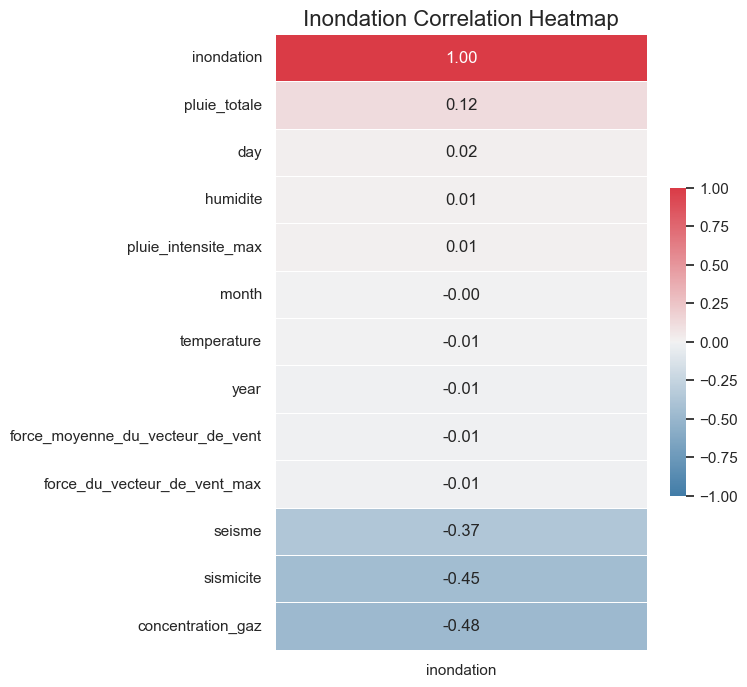

In [5]:
# calcule de la correlation matrice, excludant 'date' and 'quartier' columns
corr_mat = df[[c for c in df.columns if c not in ['date', 'quartier', 'catastrophe', ]]].corr()

# Focus on seism correlation
seism_corr = corr_mat[['seisme']].sort_values(by='seisme', ascending=False)
inondation_corr = corr_mat[['inondation']].sort_values(by='inondation', ascending=False)

# Set up the matplotlib figure
sns.set(style="white")
fig, ax = plt.subplots(figsize=(6, 8))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(
    seism_corr, cmap=cmap, annot=True,
    fmt=".2f", vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax
)
ax.set_title("Seism Correlation Heatmap", fontsize=16)
sns.set(style="darkgrid")

plt.show()
sns.set(style="white")
fig, ax = plt.subplots(figsize=(6, 8))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(
    inondation_corr, cmap=cmap, annot=True,
    fmt=".2f", vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax
)
ax.set_title("Inondation Correlation Heatmap", fontsize=16)
sns.set(style="darkgrid")

plt.show()


# Generation de Correlation Innondation Heatmap pour chaque zone

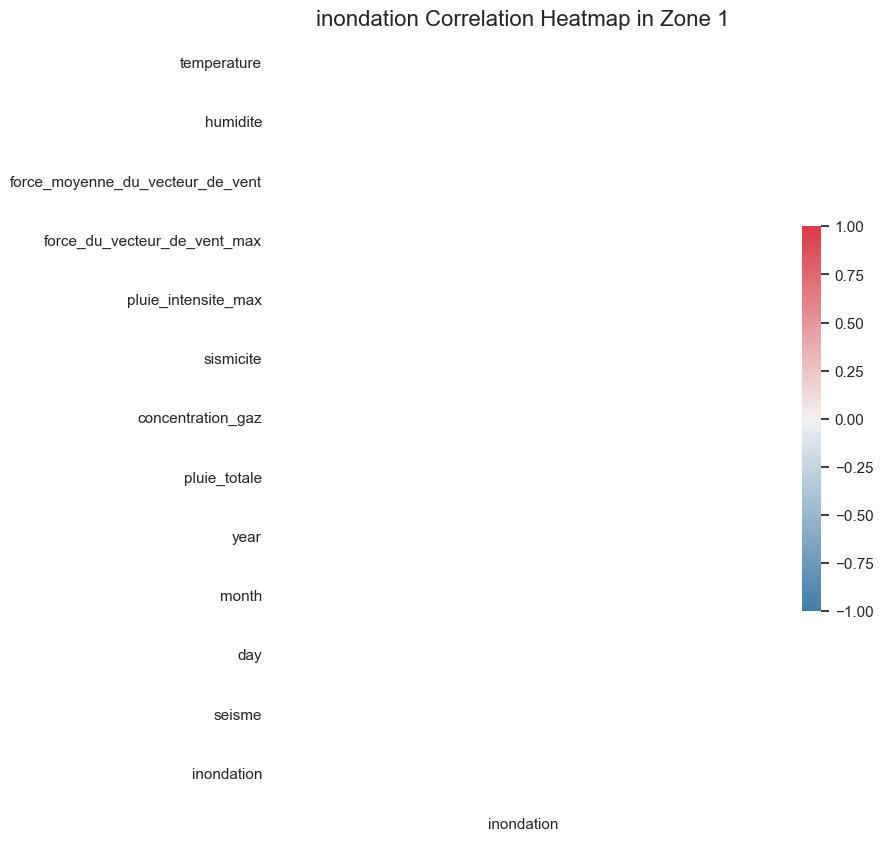

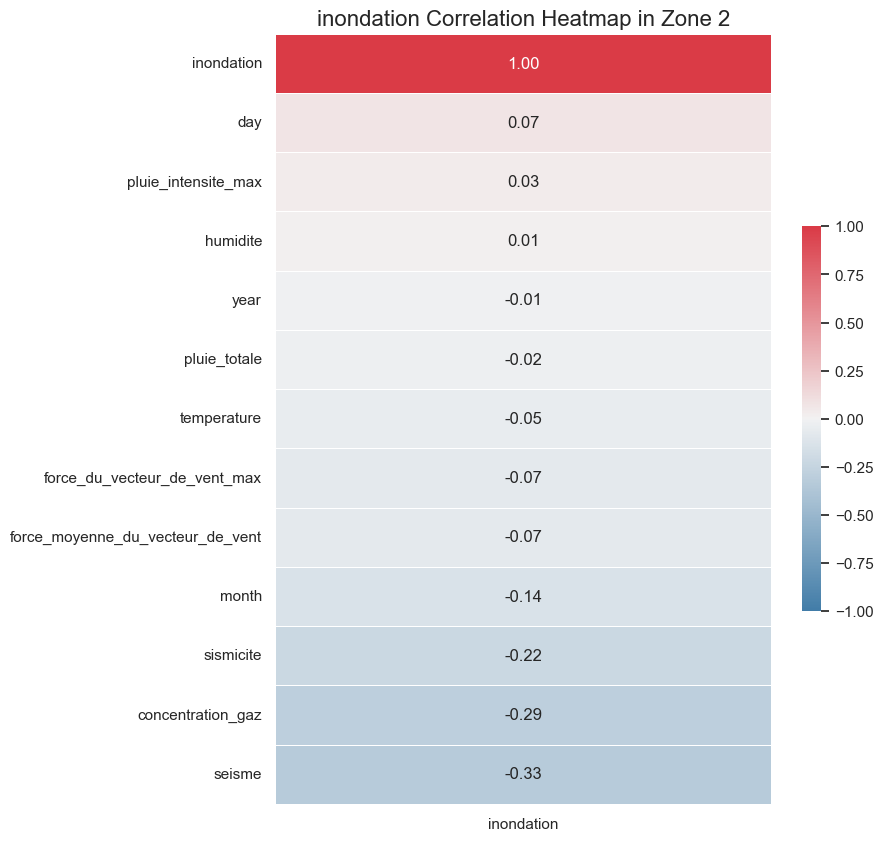

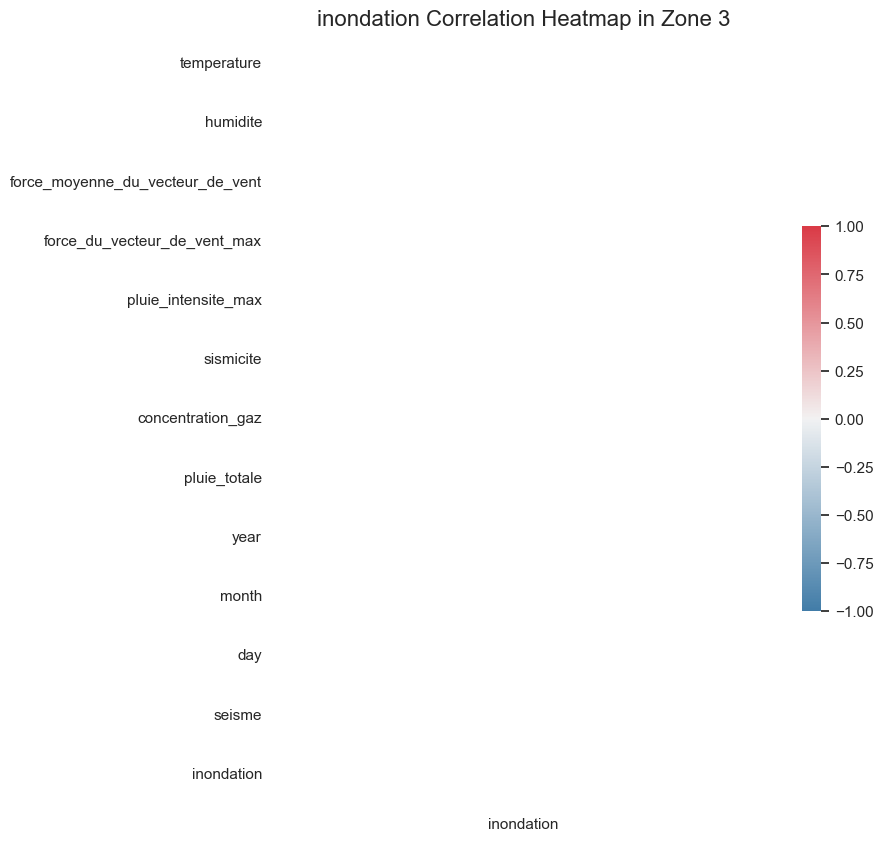

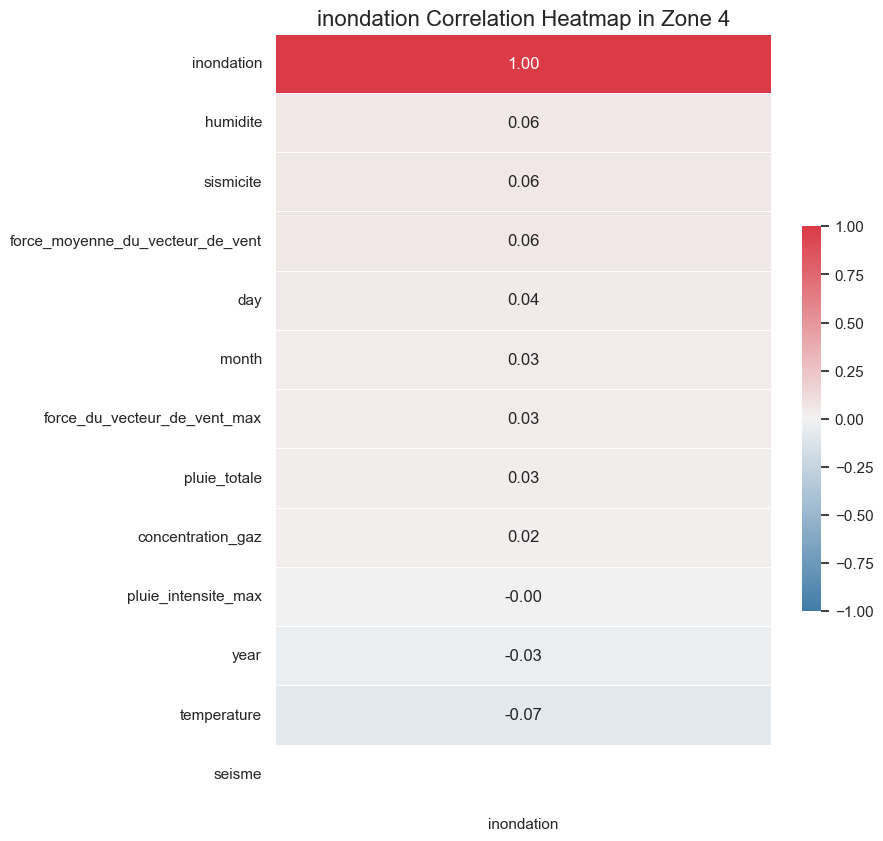

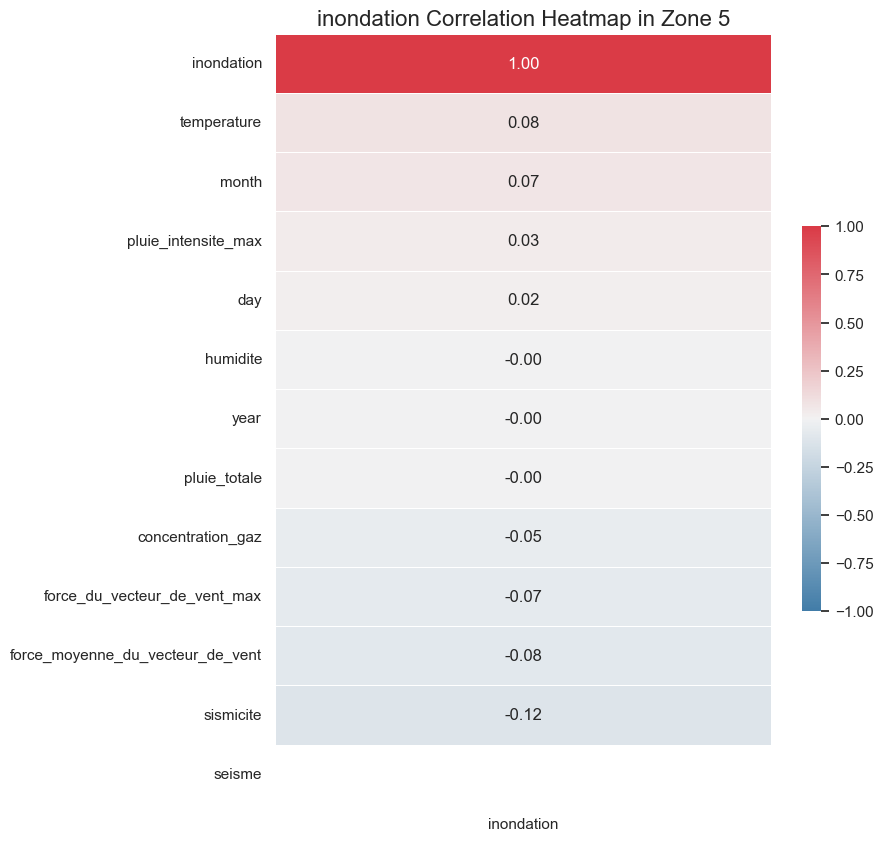

In [10]:
zones = df['quartier'].unique()
for zone in zones:
    zone_data = df[df['quartier'] == zone]
    corr_mat = zone_data[[c for c in zone_data.columns if c not in ['date', 'quartier', 'catastrophe']]].corr()

    # Focus on seism correlation
    inondation_corr = corr_mat[['inondation']].sort_values(by='inondation', ascending=False)

    # Set up the matplotlib figure
    sns.set(style="white")
    fig, ax = plt.subplots(figsize=(8, 10))
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

    # Draw the heatmap for seism correlation
    sns.heatmap(
        inondation_corr, cmap=cmap, annot=True,
        fmt=".2f", vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax
    )
    ax.set_title(f"inondation Correlation Heatmap in {zone}", fontsize=16)
    sns.set(style="darkgrid")

    plt.show()


# Generation de Correlation Seisme Heatmap pour chaque zone

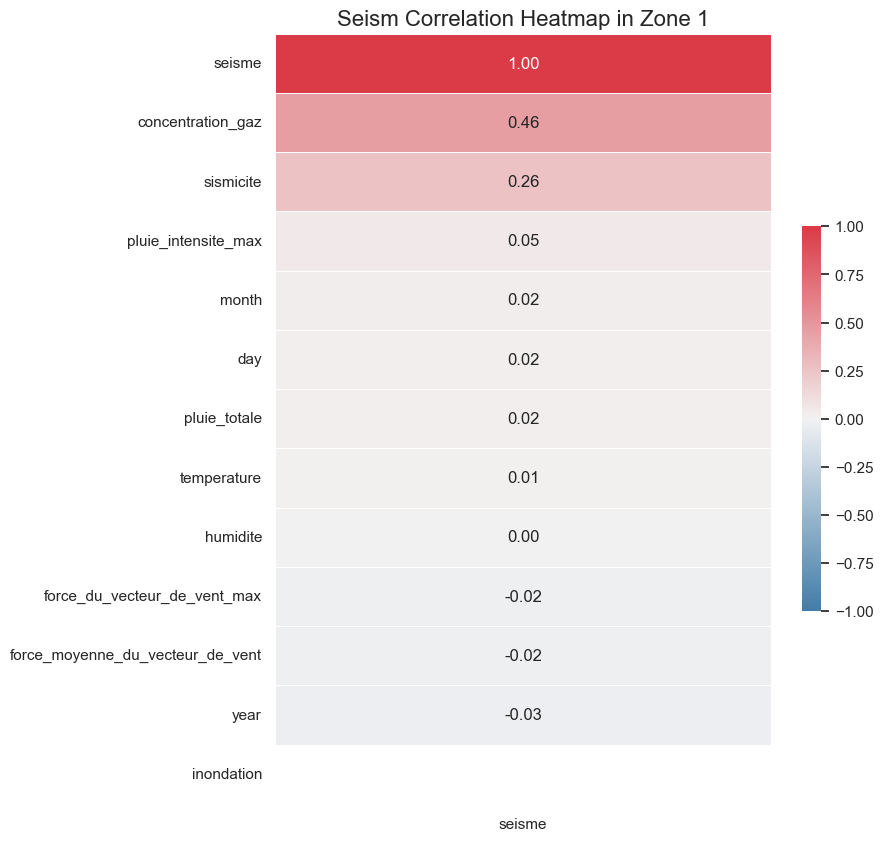

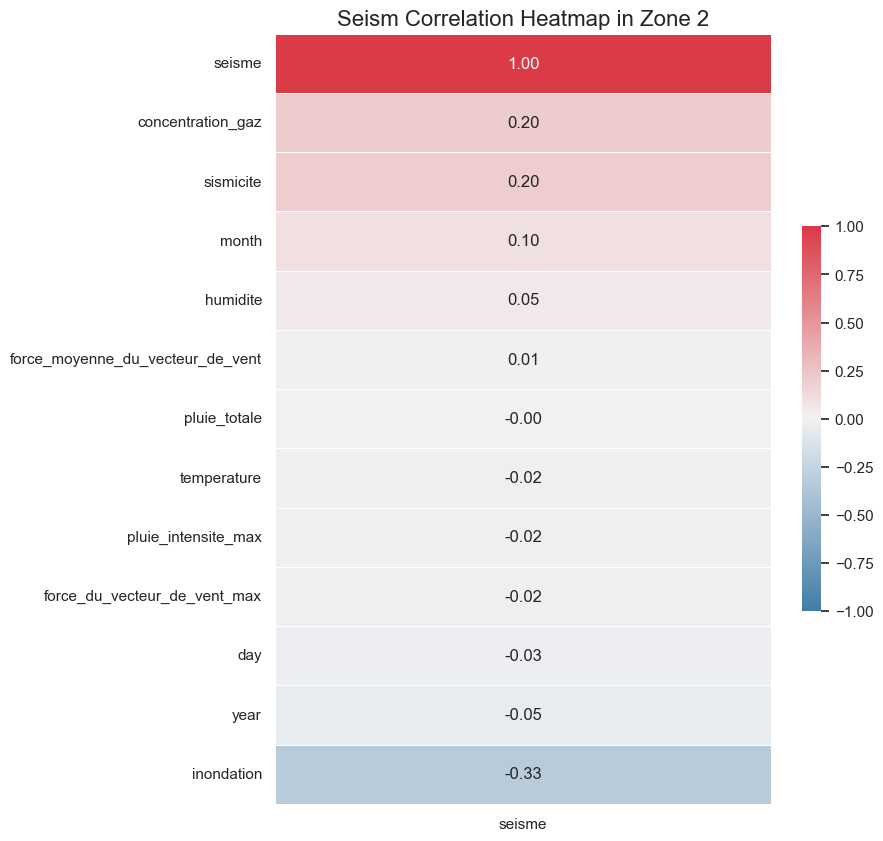

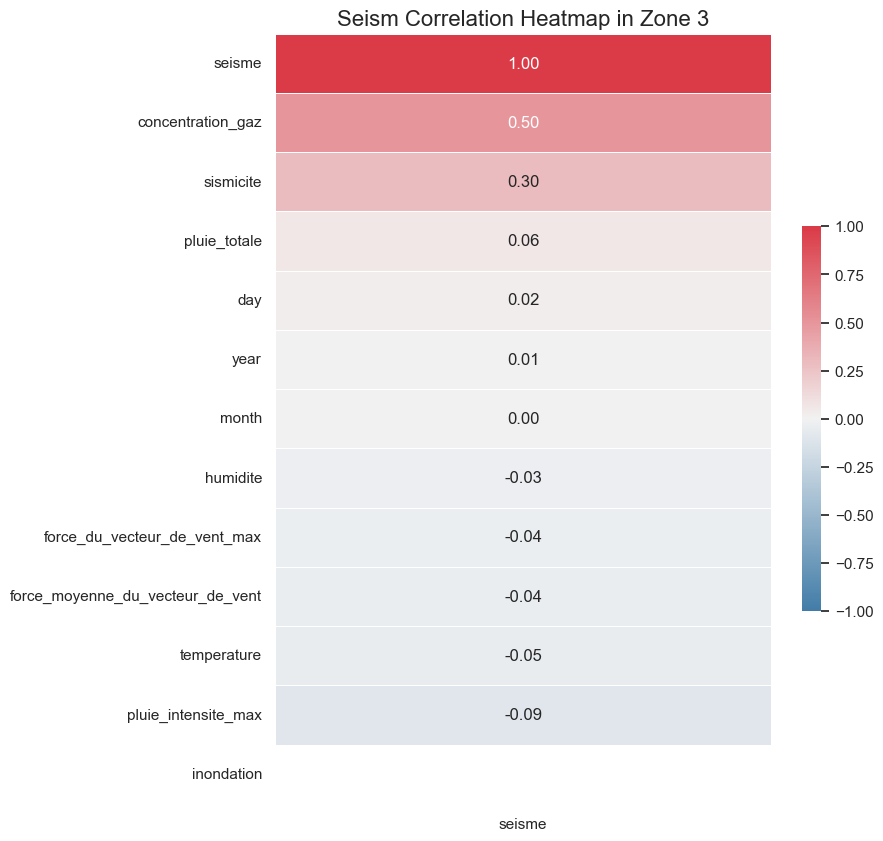

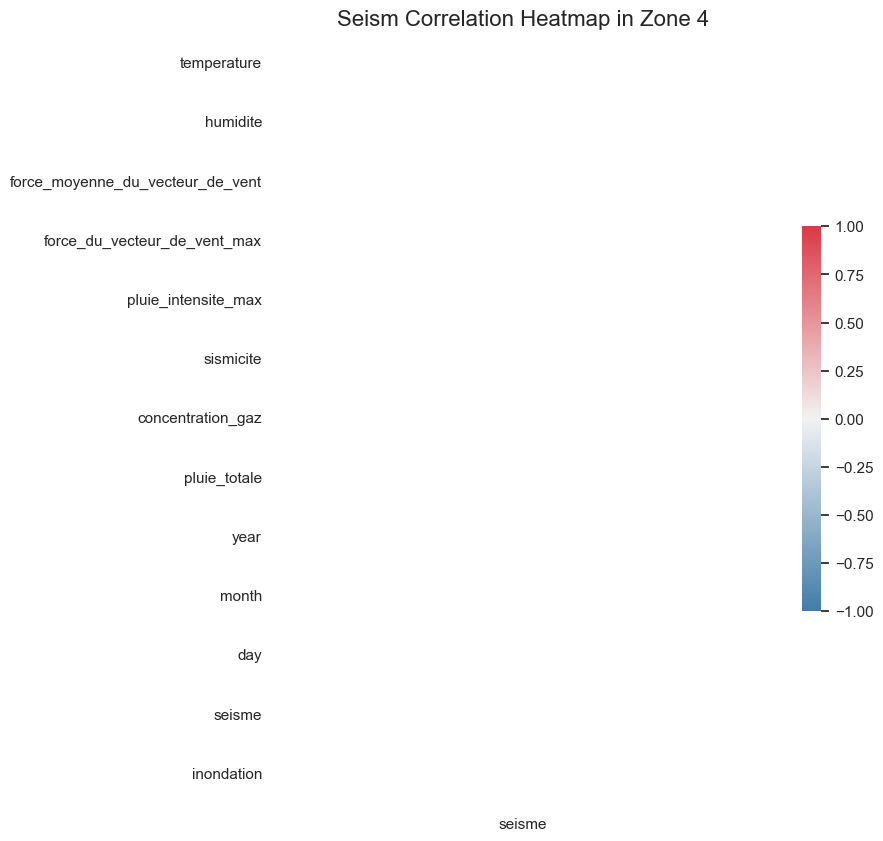

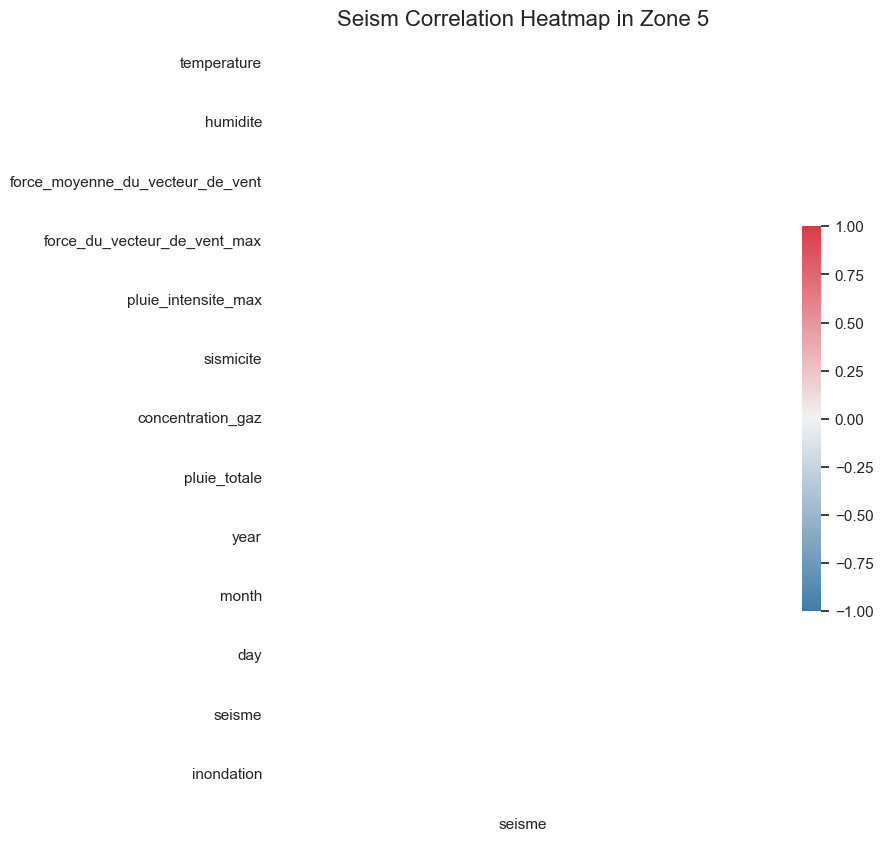

In [11]:
zones = df['quartier'].unique()
for zone in zones:
    zone_data = df[df['quartier'] == zone]
    corr_mat = zone_data[[c for c in zone_data.columns if c not in ['date', 'quartier', 'catastrophe']]].corr()

    # Focus on seism correlation
    seism_corr = corr_mat[['seisme']].sort_values(by='seisme', ascending=False)

    # Set up the matplotlib figure
    sns.set(style="white")
    fig, ax = plt.subplots(figsize=(8, 10))
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

    # Draw the heatmap for seism correlation
    sns.heatmap(
        seism_corr, cmap=cmap, annot=True,
        fmt=".2f", vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax
    )
    ax.set_title(f"Seism Correlation Heatmap in {zone}", fontsize=16)
    sns.set(style="darkgrid")

    plt.show()


# Créer Les charts pour chaque zone seisme par rapport a la concentration de gaz


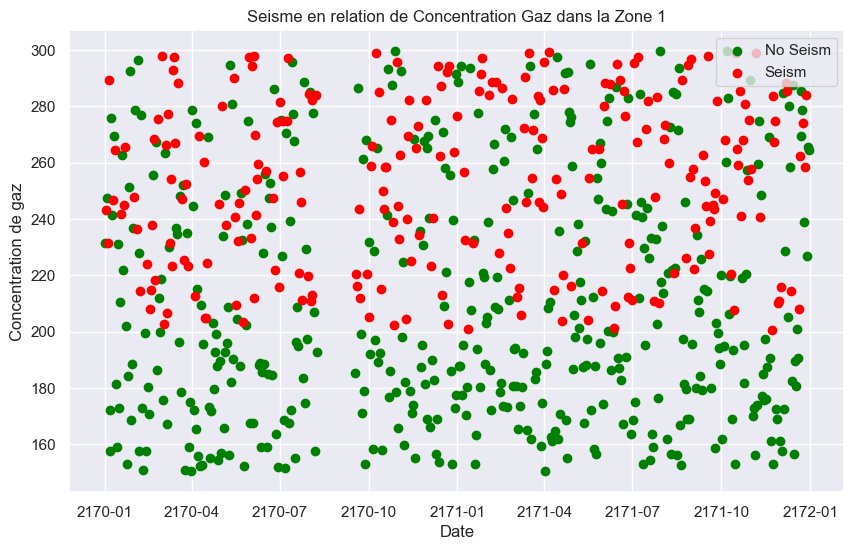

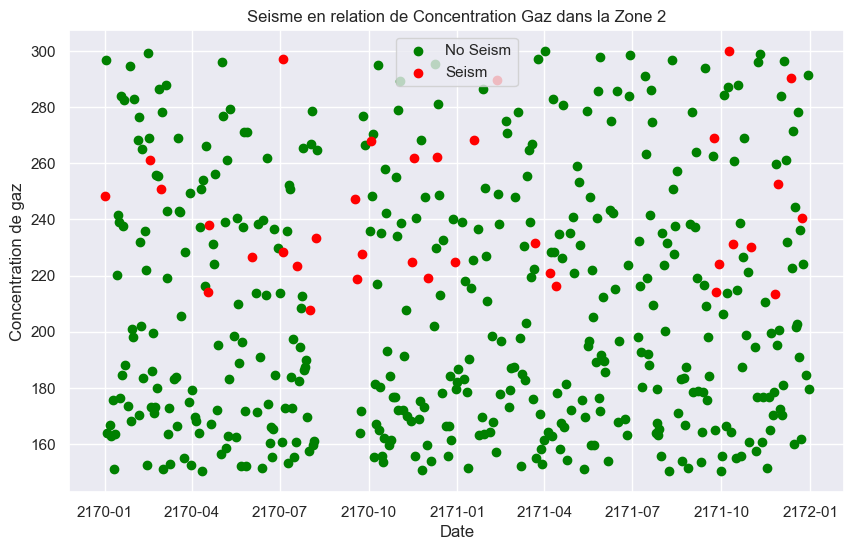

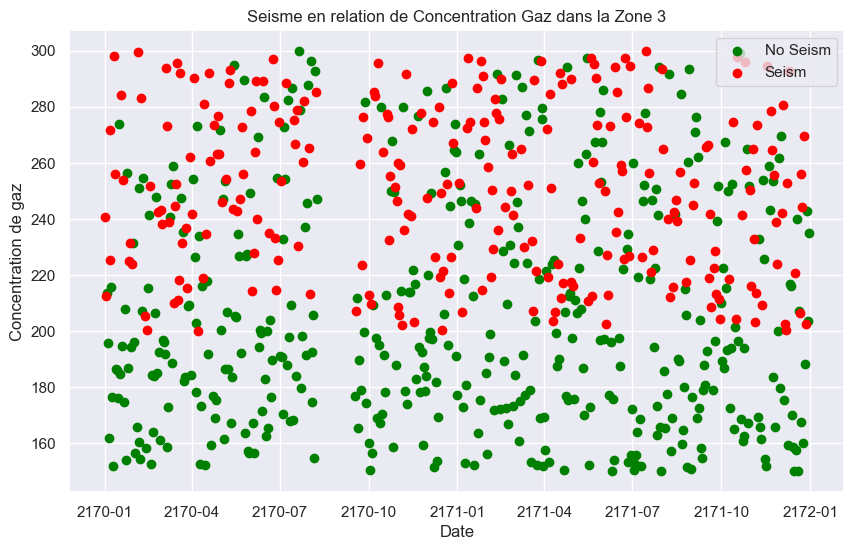

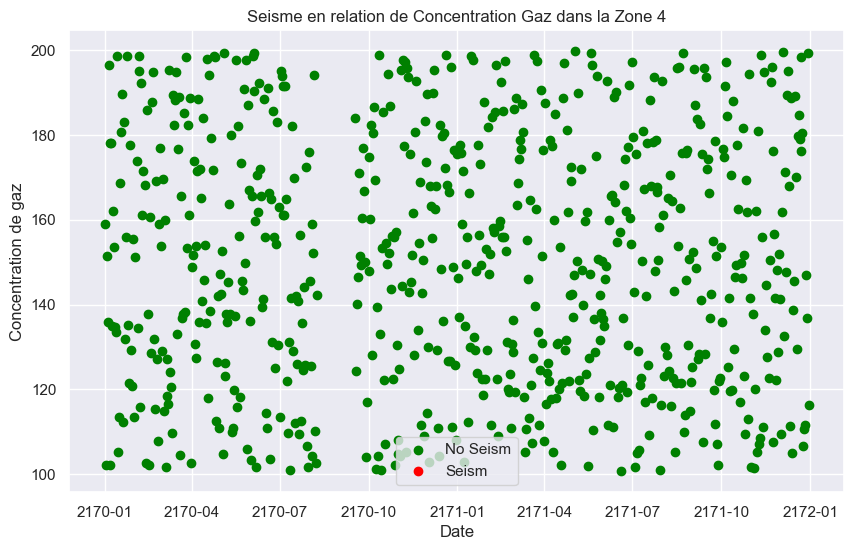

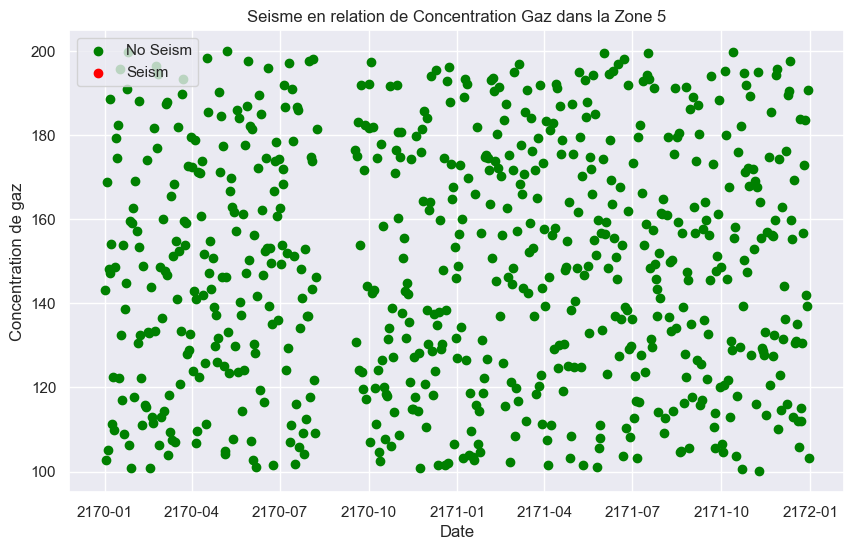

In [9]:
df['date'] = pd.to_datetime(df['date'])

zones = df['quartier'].unique()
for zone in zones:
    zone_data = df[df['quartier'] == zone]

    plt.figure(figsize=(10, 6))
    plt.scatter(zone_data[zone_data['seisme'] == False]['date'], zone_data[zone_data['seisme'] == False]['concentration_gaz'], color='green', label='No Seism')
    plt.scatter(zone_data[zone_data['seisme'] == True]['date'], zone_data[zone_data['seisme'] == True]['concentration_gaz'], color='red', label='Seism')

    plt.title(f'Seisme en relation de Concentration Gaz dans la {zone}')
    plt.xlabel('Date')
    plt.ylabel('Concentration de gaz')
    plt.legend()
    plt.grid(True)
    plt.show()
